In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [226]:
def pullFullDefenseSeasonData():
    weeks= [2,3,4,5]
    dates = pd.date_range(start='9/20/2020', periods=4, freq="W")
    weekly_data = []
    for week in weeks:
        stats = 'A_UncleanedData/NFL/DFN NFL Defense DK Week {}.csv'.format(week)
        file = pd.read_csv(stats)
        file['Week'] = pd.to_datetime(dates[week-2])
        weekly_data.append(file)

    season = pd.concat(weekly_data)
    season = season.set_index(['Week', 'Player Name'])
    return season

def pullFullOffenseSeasonData():
    weeks= [2,3,4,5]
    dates = pd.date_range(start='9/20/2020', periods=4, freq="W")
    weekly_data = []
    for week in weeks:
        stats = 'A_UncleanedData/NFL/DFN NFL Offense DK Week {}.csv'.format(week)
        file = pd.read_csv(stats)
        file['Week'] = pd.to_datetime(dates[week-2])
        weekly_data.append(file)

    season = pd.concat(weekly_data)
    season = season.set_index(['Week', 'Player Name'])
    return season

def pullWeekData(week):
    dates = pd.date_range(start='9/20/2020', periods=4, freq="W")
    stats = 'A_UncleanedData/NFL/DFN NFL Offense DK Week {}.csv'.format(week)
    file = pd.read_csv(stats)
    file['Week'] = pd.to_datetime(dates[week-2])
    file.set_index(['Week', 'Player Name'])
    return file
    

In [227]:
season =  pullFullOffenseSeasonData()
season.columns

Index(['Likes', 'Inj', 'Pos', 'Salary', 'Team', 'Opp', 'Vegas Pts',
       'Vegas Spread', 'Defense Pass Yds/G', 'Defense Rush Yds/G', 'DvP',
       'L3 Pass Att', 'S Pass Att', 'Proj Pass Att', 'Red Zone Pass Att',
       'Yards Per Pass Att', 'L3 Rush Att', 'S Rush Att', 'Proj Rush Att',
       'Red Zone Rush Att', 'Yards Per Rush Att', 'L3 Targets', 'S Targets',
       'Proj Targets', 'Red Zone Targets', 'Yards Per Target',
       'Projected Usage', 'L3 FP', 'L16 FP', 'S FP', 'Floor FP', 'Ceil FP',
       'Proj FP', 'Proj Val', 'Actual FP', 'Actual Val'],
      dtype='object')

## Pos Breakdown

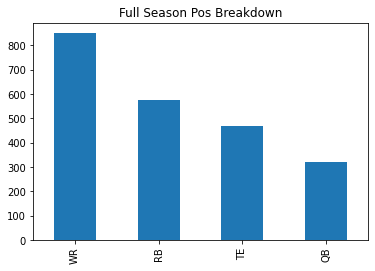

In [228]:
season['Pos'].value_counts().plot(kind='bar', title='Full Season Pos Breakdown');

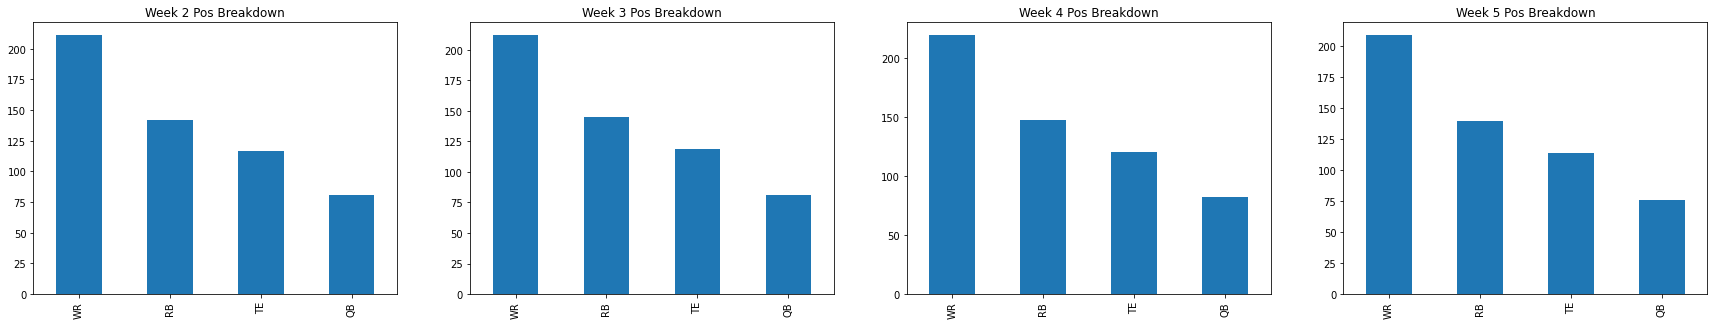

In [229]:
plt.figure(figsize=(30,5), facecolor='white')

plot_number = 1
for w in range(2,6):
    ax = plt.subplot(1, 4, plot_number)
    pullWeekData(w)['Pos'].value_counts().plot(kind='bar', ax=ax, title='Week {} Pos Breakdown'.format(w));
    plot_number = plot_number+1

## Actual FP Breakdown

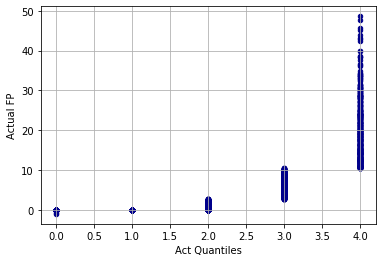

In [230]:
fp_breakdown = season
fp_breakdown['Act Quantiles'] = pd.qcut(fp_breakdown['Actual FP'].rank(method='first'), 5, labels=False)
fp_breakdown.plot.scatter(x='Act Quantiles',
                                y='Actual FP',
                                c='DarkBlue', 
                                grid=True);

<AxesSubplot:title={'center':'Salary'}, xlabel='Act Quantiles'>

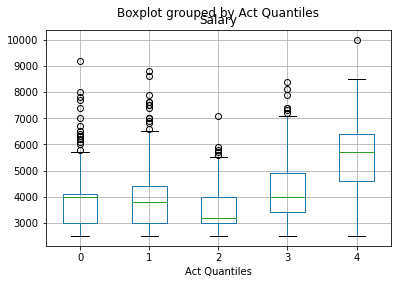

In [231]:
fp_breakdown.boxplot(column='Salary',by='Act Quantiles')

<AxesSubplot:>

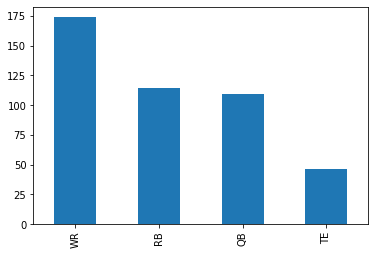

In [232]:
fp_breakdown[fp_breakdown['Act Quantiles'] == 4]['Pos'].value_counts().plot(kind='bar')

In [233]:
fp_breakdown.groupby(by='Act Quantiles')['Actual FP'].describe()

,count,mean,std,min,25%,50%,75%,max
Act Quantiles,,,,,,,,
0,443.0,-0.005418,0.059542,-1.0,0.0,0.0,0.00,0.0
1,443.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
2,443.0,0.795260,0.913598,0.0,0.0,0.2,1.60,2.7
3,443.0,6.320542,2.145585,2.7,4.4,6.3,8.15,10.5
4,443.0,19.546275,7.568663,10.5,13.4,17.8,23.90,48.6


               count       mean       std   min     25%    50%     75%   max
Act Quantiles                                                               
0              111.0  -0.003604  0.023073  -0.2   0.000   0.00   0.000   0.0
1              110.0   0.000000  0.000000   0.0   0.000   0.00   0.000   0.0
2              110.0   1.448182  1.251475   0.0   0.000   1.40   2.175   4.1
3              110.0   7.580000  2.131967   4.1   5.925   7.30   9.175  12.0
4              110.0  20.533636  7.479173  12.0  14.425  18.75  24.000  48.6
               count       mean       std   min     25%   50%    75%   max
Act Quantiles                                                             
0              112.0   0.000000  0.000000   0.0   0.000   0.0   0.00   0.0
1              111.0   0.000000  0.000000   0.0   0.000   0.0   0.00   0.0
2              111.0   1.131532  1.118033   0.0   0.000   1.0   2.00   3.3
3              111.0   6.795495  2.079440   3.4   5.150   7.1   8.55  10.5
4          

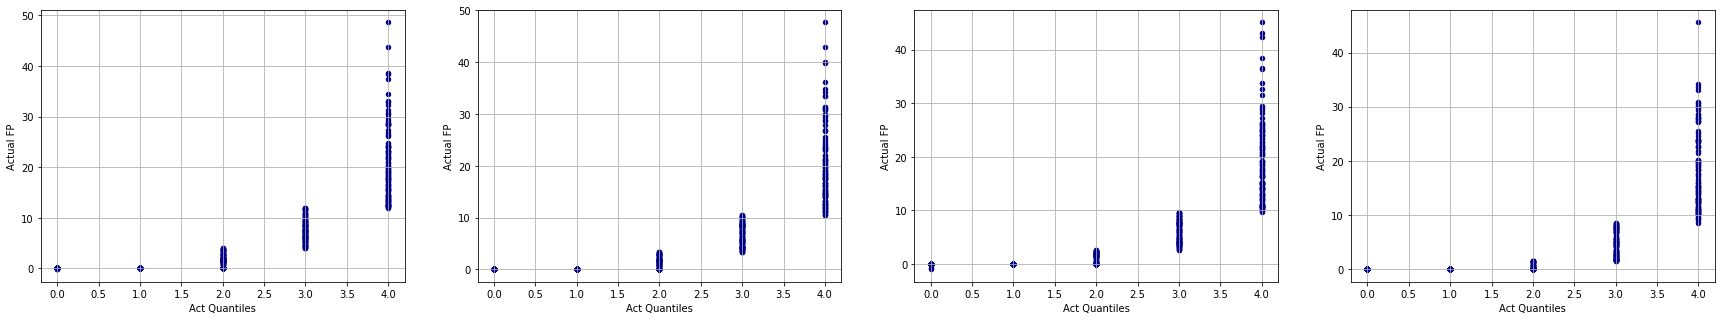

In [234]:
plt.figure(figsize=(30,5), facecolor='white')

plot_number = 1
for w in range(2,6):
    ax = plt.subplot(1, 4, plot_number)
    week_breakdown = pullWeekData(w)
    week_breakdown['Act Quantiles'] = pd.qcut(week_breakdown['Actual FP'].rank(method='first'), 5, labels=False)
    print(week_breakdown.groupby(by='Act Quantiles')['Actual FP'].describe())
    week_breakdown.plot.scatter(x='Act Quantiles',
                                y='Actual FP',
                                c='DarkBlue', 
                                grid=True, 
                                ax=ax)
    plot_number = plot_number+1

## Actual FP By Pos

In [235]:
pos_fp = season
pos_fp_stats = pos_fp.groupby(by='Pos')['Actual FP'].describe()
print(pos_fb_stats)

     count      mean        std  min  25%   50%     75%   max
Pos                                                          
QB   320.0  7.881562  11.290341 -0.7  0.0  0.00  15.200  43.8
RB   574.0  5.367944   8.175937 -0.1  0.0  1.35   7.775  48.6
TE   470.0  3.373617   5.900788  0.0  0.0  0.00   4.575  43.1
WR   851.0  5.428907   7.882141 -1.0  0.0  1.30   8.300  45.6


<AxesSubplot:xlabel='Pos'>

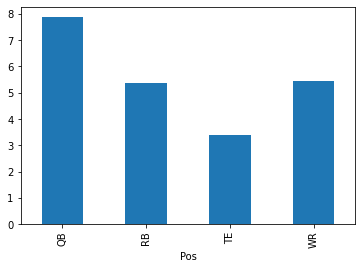

In [236]:
pos_fp_stats['mean'].plot(kind='bar')

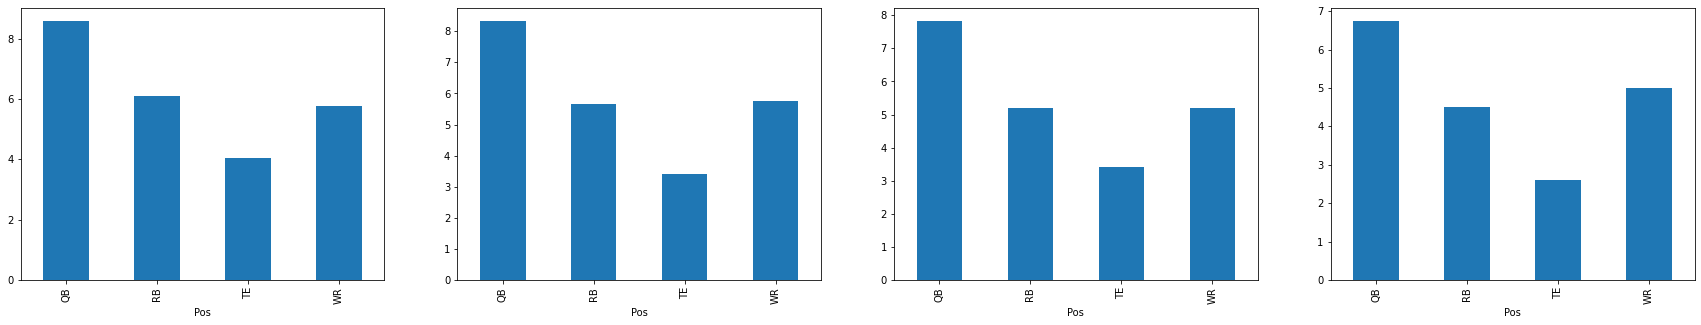

In [237]:
plt.figure(figsize=(30,5), facecolor='white')

plot_number = 1
for w in range(2,6):
    ax = plt.subplot(1, 4, plot_number)
    week_breakdown = pullWeekData(w)
    week_breakdown.groupby(by='Pos')['Actual FP'].describe()['mean'].plot(kind='bar', ax=ax)
    plot_number = plot_number+1

In [238]:
pos_fp['C'] = pos_fp.groupby(by='Pos')['Actual FP'].transform(
                     lambda x: pd.qcut(x.rank(method='first'), 5, labels=False))


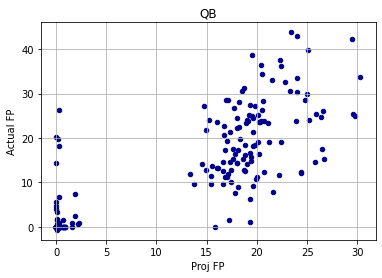

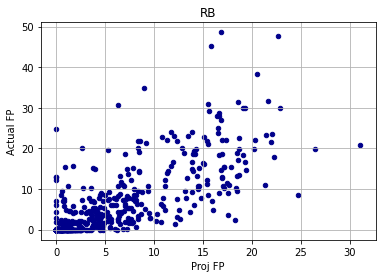

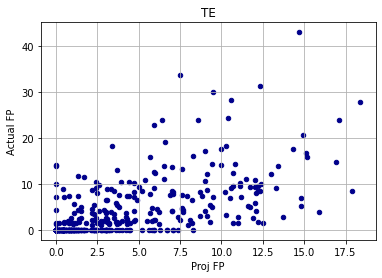

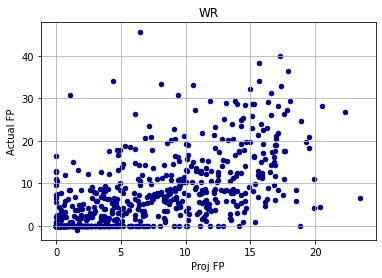

In [239]:
axes = pos_fp.groupby(by='Pos').plot.scatter(x='Proj FP',
                                y='Actual FP',
                                c='DarkBlue', 
                                grid=True);

for i, (groupname, group) in enumerate(pos_fp.groupby(by='Pos')):
    axes[i].set_title(groupname)

In [240]:
pos_fp.groupby(by='Pos').get_group('QB').groupby(by='C')['Actual FP'].describe()

,count,mean,std,min,25%,50%,75%,max
C,,,,,,,,
0.0,64.0,-0.018750,0.092367,-0.7,0.0,0.00,0.00,0.0
1.0,64.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0
2.0,64.0,0.121875,0.319458,0.0,0.0,0.00,0.00,1.5
3.0,64.0,12.023438,4.579310,1.6,9.7,12.65,15.20,19.1
4.0,64.0,27.281250,6.078113,19.2,23.5,25.30,30.35,43.8


In [241]:
pos_fp.groupby(by='Pos').get_group('WR').groupby(by='C')['Actual FP'].describe()

,count,mean,std,min,25%,50%,75%,max
C,,,,,,,,
0.0,171.0,-0.005848,0.076472,-1.0,0.0,0.00,0.000,0.0
1.0,170.0,0.000000,0.000000,0.0,0.0,0.00,0.000,0.0
2.0,170.0,1.381765,1.345854,0.0,0.0,1.30,2.475,4.0
3.0,170.0,7.001176,1.742982,4.1,5.6,6.90,8.300,10.6
4.0,170.0,18.799412,7.021324,10.7,13.0,17.35,22.725,45.6


In [242]:
pos_fp.groupby(by='Pos').get_group('TE').groupby(by='C')['Actual FP'].describe()

,count,mean,std,min,25%,50%,75%,max
C,,,,,,,,
0.0,94.0,0.000000,0.000000,0.0,0.0,0.00,0.000,0.0
1.0,94.0,0.000000,0.000000,0.0,0.0,0.00,0.000,0.0
2.0,94.0,0.302128,0.570791,0.0,0.0,0.00,0.000,1.6
3.0,94.0,3.541489,1.583885,1.6,2.1,3.45,4.575,7.1
4.0,94.0,13.024468,6.785860,7.1,8.5,10.45,14.375,43.1


In [243]:
pos_fp.groupby(by='Pos').get_group('RB').groupby(by='C')['Actual FP'].describe()

,count,mean,std,min,25%,50%,75%,max
C,,,,,,,,
0.0,115.0,-0.001739,0.013130,-0.1,0.00,0.00,0.00,0.0
1.0,115.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.0
2.0,114.0,1.196491,0.961648,0.0,0.20,1.35,1.90,3.0
3.0,115.0,6.281739,2.051084,3.0,4.45,6.10,7.75,10.3
4.0,115.0,19.326957,7.609497,10.3,13.85,18.50,22.30,48.6


In [296]:
defense = pullFullDefenseSeasonData()
defense['Vegas PtsA'] = 1/defense['Vegas PtsA'] * 100

In [297]:
print(defense.corr()['Actual FP'].sort_values(ascending=False))

Actual FP                     1.000000
Actual Val                    0.959480
Vegas PtsA                    0.400041
Proj FP                       0.387775
Likes                         0.362146
Salary                        0.294555
Proj Val                      0.263623
Sacks Allowed by Offense      0.230374
FP Allowed by Offense         0.202402
L3 FP                         0.154647
L16 FP                        0.153325
S FP                          0.153325
Ceil FP                       0.129769
Floor FP                      0.120494
Ints Allowed by Offense       0.047354
Fumbles Allowed by Offense    0.036894
Offense Rush Yds/G           -0.118309
Offense Pass Yds/G           -0.121352
Allowed                      -0.187878
Points Scored by Offense     -0.201486
Name: Actual FP, dtype: float64


               count       mean       std  min    25%   50%   75%   max
Act Quantiles                                                          
0               26.0  -0.615385  1.235376 -3.0  -1.75   0.0   0.0   1.0
1               25.0   2.680000  0.748331  1.0   2.00   3.0   3.0   4.0
2               25.0   4.520000  0.509902  4.0   4.00   5.0   5.0   5.0
3               25.0   6.840000  0.986577  5.0   6.00   7.0   7.0   9.0
4               25.0  14.080000  4.471391  9.0  11.00  12.0  15.0  26.0


<AxesSubplot:xlabel='Act Quantiles', ylabel='Actual FP'>

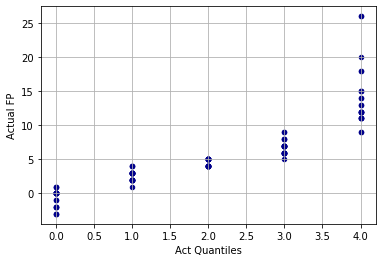

In [290]:
defense['Act Quantiles'] = pd.qcut(defense['Actual FP'].rank(method='first'), 5, labels=False)
print(defense.groupby(by='Act Quantiles')['Actual FP'].describe())
defense.plot.scatter(x='Act Quantiles',
                            y='Actual FP',
                            c='DarkBlue', 
                            grid=True, 
                           )

<AxesSubplot:title={'center':'Allowed'}, xlabel='Act Quantiles'>

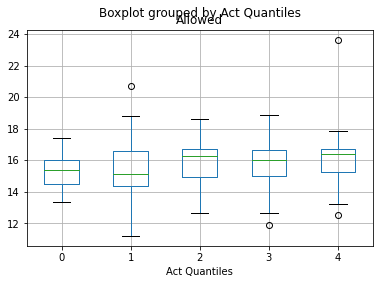

In [291]:
defense.boxplot(column='Allowed',by='Act Quantiles')

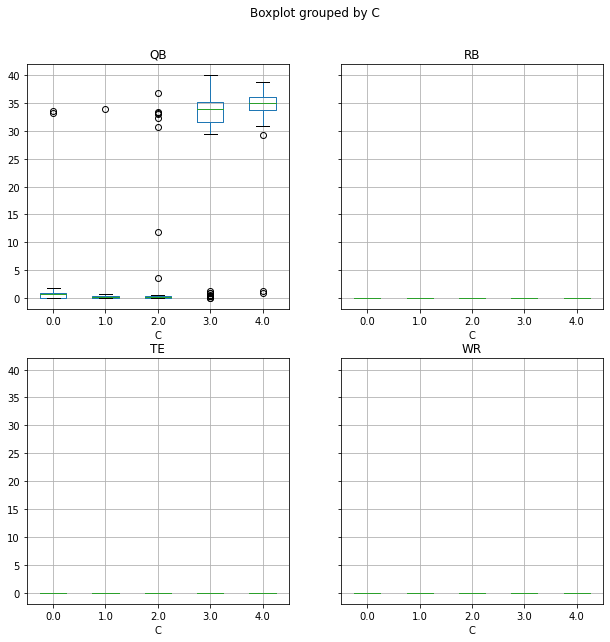

In [222]:
axes = pos_fp.groupby(by='Pos').boxplot(column='Proj Pass Att',by='C', figsize=(10,10))

for i, (groupname, group) in enumerate(pos_fp.groupby(by='Pos')):
    axes[i].set_title(groupname)